Prototypes shape: (14, 50), elements: [-1  1]
Test patterns shape: (25, 50), elements: [-1  1]


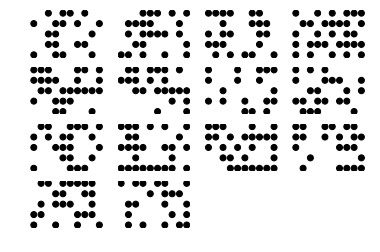

In [32]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

np.random.seed(0)
# training prototyps
prototypes = np.random.choice([-1, +1], [14, 50])
fig, axes = pyplot.subplots(4, 4)
for i, ax in enumerate(axes.flatten()):
    ax.axis('off')
    if i >= len(prototypes):
        continue
    colors = ['white' if prototypes[i, j] == 1 else 'black' for j in range(prototypes.shape[1])]
    ax.scatter(np.repeat(list(range(10)), 5), np.tile(list(range(5)), 10), c=colors)
# testing patterns
vectors = np.random.choice([-1, +1], [25, 50])
print("Prototypes shape: {}, elements: {}".format(prototypes.shape, np.unique(prototypes)))
print("Test patterns shape: {}, elements: {}".format(vectors.shape, np.unique(vectors)))

Network capacity is roughly .14 times the number of nodes. 7 is exactly the max capacity of the network (.14 * 50 = 7)

In [36]:
import itertools


class HopfieldNet(object):
    def __init__(self):
        self.units = np.random.choice([-1, +1], 50)
        self.weights = np.zeros([50, 50])

    def train(self, prototypes):
        for i, j in itertools.product(list(range(50)), list(range(50))):
            if i == j:
                self.weights[i, j] = 0  # no self-connections
            self.weights[i, j] = (1 / len(prototypes)) * sum(
                prototypes[u, i] * prototypes[u, j] for u in range(len(prototypes)))

    def __call__(self, unit):
        prev_state = self.units[unit]
        self.units[unit] = +1 if sum(self.weights[unit, j] * self.units[j] for j in range(len(self.units))) else -1
        changed = prev_state != self.units[unit]
        return changed


<BarContainer object of 4 artists>

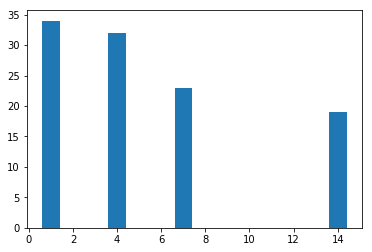

In [38]:
%matplotlib inline
from matplotlib import pyplot

prototype_nums = [1, 4, 7, 14]
block_updates = []
for num_prototypes in prototype_nums:
    net = HopfieldNet()
    net.train(prototypes[:num_prototypes, :])
    for block in itertools.count():
        units = list(range(50))
        np.random.shuffle(units)
        changed = False
        for unit in units:
            changed = changed or net(unit)
        if not changed:
            break  # done, converged
    block_updates.append(block)

pyplot.bar(prototype_nums, block_updates)

Interesting. I did not expect the number of steps to go down, I would have thought it would be more depending on the number of patterns.
But I guess, this makes sense given that the network probably only converges to spurious states. However, for the versions with few (<= 7) patterns, the network shouldn't converge to spurious states.